### Summary of Work Process

In this script, I calculated both the crude death rate and the age-standardized death rate for chronic obstructive pulmonary disease (COPD) in the United States and Uganda for the year 2019. The process involves several steps. First, I loaded the age-specific death rate data for COPD in both countries. I then calculated the crude death rate by summing the age-specific death rates for each country.

For the age-standardized death rate, I utilized the WHO World Standard Population distribution to calculate the weighted sum for each age group. This involved multiplying the death rates for each age group by the corresponding percentage distribution in the WHO standard population. The weighted sums were then divided by the total population of each country to obtain the age-standardized death rate per 100,000 people.

I got the total population data of both nations from the resources provided. The differences between the crude death rates and age-standardized death rates can be attributed to population age distributions. The crude death rate reflects the actual death rate without adjusting for differences in age distributions between populations. On the other hand, the age-standardized death rate accounts for variations in age distributions, providing a more accurate comparison between populations with different age structures. Age-standardization allows for a fair comparison by removing the effect of age as a confounding variable, enabling us to assess the true impact of COPD on mortality rates across different populations.

In [1]:
import pandas as pd

# Load the table of age-specific death rates of COPD for the United States and Uganda
us_data = {
    'Age Group (years)': ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49',
                          '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85+'],
    'Death rate per 100,000 (United States, 2019)': [0.04, 0.02, 0.02, 0.02, 0.06, 0.11, 0.29, 0.56, 1.42, 4.00,
                                                      14.13, 37.22, 66.48, 108.66, 213.10, 333.06, 491.10, 894.45]
}

uganda_data = {
    'Age Group (years)': ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49',
                          '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85+'],
    'Death rate per 100,000 (Uganda, 2019)': [0.40, 0.17, 0.07, 0.23, 0.38, 0.40, 0.75, 1.11, 2.04, 5.51,
                                               13.26, 33.25, 69.62, 120.78, 229.88, 341.06, 529.31, 710.40]
}

# Create DataFrames
dth_us = pd.DataFrame(us_data)
dth_ug = pd.DataFrame(uganda_data)

# Check data integrity
print("Data loaded successfully!")
print("US DataFrame:")
print(dth_us.head())
print("\nUganda DataFrame:")
print(dth_ug.head())

Data loaded successfully!
US DataFrame:
  Age Group (years)  Death rate per 100,000 (United States, 2019)
0               0-4                                          0.04
1               5-9                                          0.02
2             10-14                                          0.02
3             15-19                                          0.02
4             20-24                                          0.06

Uganda DataFrame:
  Age Group (years)  Death rate per 100,000 (Uganda, 2019)
0               0-4                                   0.40
1               5-9                                   0.17
2             10-14                                   0.07
3             15-19                                   0.23
4             20-24                                   0.38


In [2]:
# Population of the United States in 2019 (estimated) according to UN World Population Prospects (2022) — Population Estimates 1950-2021
us_population_2019 = 334320000

# Calculate the total deaths in the United States in 2019
total_deaths_us = sum(dth_us["Death rate per 100,000 (United States, 2019)"])

# Calculate the Crude Death Rate (CDR) for the United States in 2019
crude_death_rate_us = round((total_deaths_us / us_population_2019) * 100000, 1)

# Output the calculated Crude Death Rate (CDR) for the United States in 2019
print("Crude Death Rate (CDR) for United States in 2019:", crude_death_rate_us)

Crude Death Rate (CDR) for United States in 2019: 0.6


In [3]:
# Population of Uganda in 2019 (estimated) according to UN World Population Prospects (2022) — Population Estimates 1950-2021
ug_population_2019 = 42949000

# Calculate the total deaths in Uganda in 2019
total_deaths_ug = sum(dth_ug["Death rate per 100,000 (Uganda, 2019)"])

# Calculate the Crude Death Rate (CDR) for Uganda in 2019
cdr_ug = round((total_deaths_ug / ug_population_2019) * 1000, 1)

print("Crude Death Rate (CDR) for Uganda in 2019:", cdr_ug)

Crude Death Rate (CDR) for Uganda in 2019: 0.0


In [4]:
import pandas as pd

# Define the WHO standard population distribution
who_distribution = {
    'Age Group (years)': ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49',
                          '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85+'],
    'WHO World Standard Pop (%)': [8.86, 8.69, 8.60, 8.47, 8.22, 7.93, 7.61, 7.15, 6.59, 6.04,
                                    5.37, 4.55, 3.72, 2.96, 2.21, 1.52, 0.91, 0.63]
}

# Create a DataFrame for WHO standard population distribution
sd = pd.DataFrame(who_distribution)

# Display the first few rows of the DataFrame
sd.head()

,Age Group (years),WHO World Standard Pop (%)
0,0-4,8.86
1,5-9,8.69
2,10-14,8.60
3,15-19,8.47
4,20-24,8.22


In [5]:
# Merge death rate and standard population DataFrames on 'Age Group (years)'
us_df = pd.merge(dth_us, sd, on='Age Group (years)')
ug_df = pd.merge(dth_ug, sd, on='Age Group (years)')

# Print the first few rows of the merged DataFrames
print("Merged DataFrame for the United States:")
print(us_df.head())

print("\nMerged DataFrame for Uganda:")
print(ug_df.head())

Merged DataFrame for the United States:
  Age Group (years)  Death rate per 100,000 (United States, 2019)  \
0               0-4                                          0.04   
1               5-9                                          0.02   
2             10-14                                          0.02   
3             15-19                                          0.02   
4             20-24                                          0.06   

   WHO World Standard Pop (%)  
0                        8.86  
1                        8.69  
2                        8.60  
3                        8.47  
4                        8.22  

Merged DataFrame for Uganda:
  Age Group (years)  Death rate per 100,000 (Uganda, 2019)  \
0               0-4                                   0.40   
1               5-9                                   0.17   
2             10-14                                   0.07   
3             15-19                                   0.23   
4            

In [6]:
# Calculate the weighted sum of death rates
us_weighted_sum = sum(us_df['Death rate per 100,000 (United States, 2019)'] * us_df['WHO World Standard Pop (%)'] / 100)
ug_weighted_sum = sum(ug_df['Death rate per 100,000 (Uganda, 2019)'] * ug_df['WHO World Standard Pop (%)'] / 100)

# Calculate Age-Standardized Death Rate - ASDR
us_asdr = round(((us_weighted_sum / us_population_2019) * 100000),1)
ug_asdr = round(((ug_weighted_sum / ug_population_2019) * 100000),1)

# Print Age-Standardized Death Rates
print("Age-Standardized Death Rate (ASDR) for the United States:", us_asdr)
print("Age-Standardized Death Rate (ASDR) for Uganda:", ug_asdr)

Age-Standardized Death Rate (ASDR) for the United States: 0.0
Age-Standardized Death Rate (ASDR) for Uganda: 0.1


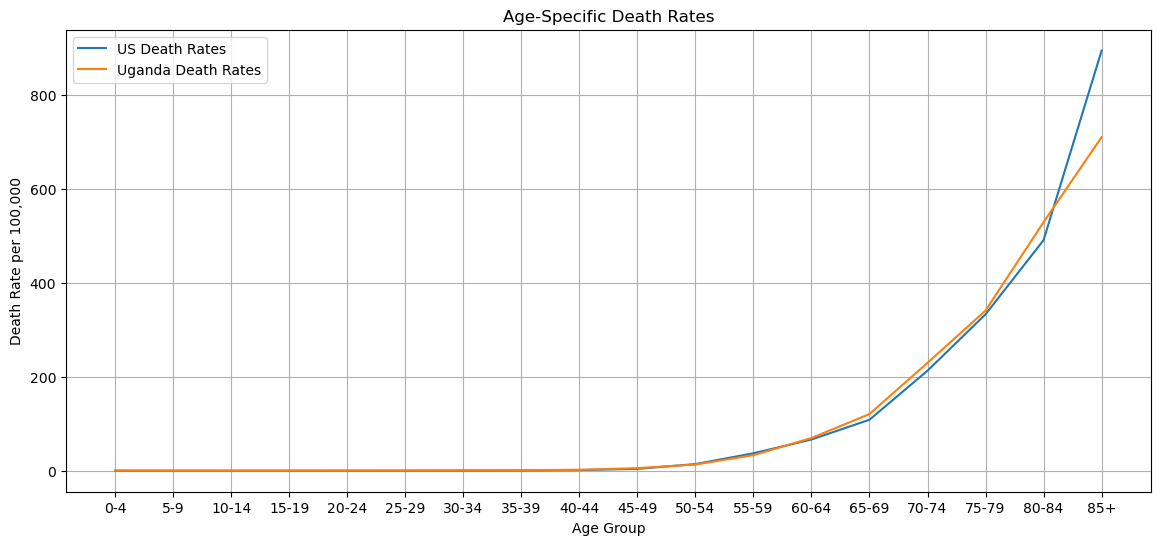

In [7]:
# for data visualization or comparison between the data on Uganda and the United States

import matplotlib.pyplot as plt

# Plotting the age-specific death rates for the United States and Uganda
plt.figure(figsize=(14, 6))

age_groups = dth_us['Age Group (years)']

us_death_rates = dth_us['Death rate per 100,000 (United States, 2019)']

ug_death_rates = dth_ug['Death rate per 100,000 (Uganda, 2019)']

plt.plot(age_groups, us_death_rates, label='US Death Rates')
plt.plot(age_groups, ug_death_rates, label='Uganda Death Rates')

plt.xlabel('Age Group')
plt.ylabel('Death Rate per 100,000')
plt.title('Age-Specific Death Rates')

plt.legend()
plt.grid(True)
plt.show()

#### OBSERVATION

The above viz does help us infer or make the following deductions;

- The death rate increases across the age groups, as persons get older.
- The US has a slighter higher death rate than Uganda, probably from being the larger country by population, aside from other factors.